In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
datos = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
datos.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
datos.shape

(1338, 7)

In [3]:
datos.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [4]:
datos.duplicated().sum()




np.int64(1)

In [5]:
data_limpio = datos.drop_duplicates()
print(data_limpio.shape)
data_limpio.head()

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


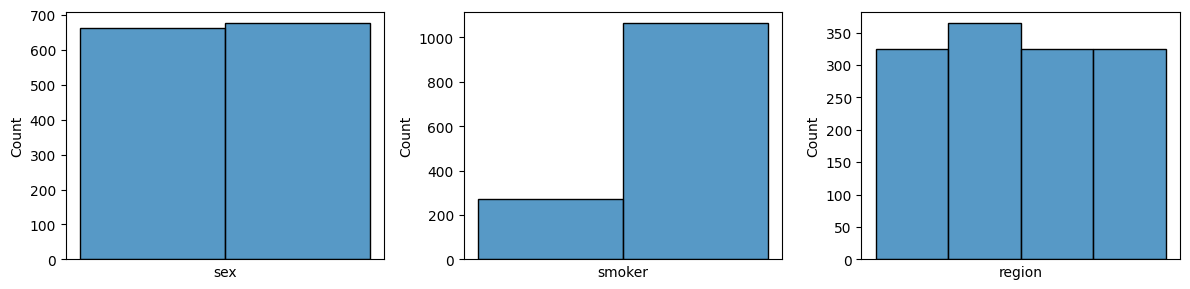

In [6]:
#Automatizacion Categoricos
categorical_variables = ["sex", "smoker", "region"]

# Calcular filas y columnas para organizar los gráficos en 3 por fila
num_cols = 3

num_rows = math.ceil(len(categorical_variables) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# Asegurar que axes es siempre una lista bidimensional
axes = axes.reshape(num_rows, num_cols) if num_rows > 1 else [axes]

# Generar los gráficos
col_index = 0
for row in range(num_rows):
    for col in range(num_cols):
        if col_index < len(categorical_variables):
            sns.histplot(data=data_limpio, x= categorical_variables[col_index], ax=axes[row][col])
            axes[row][col].set_xticks([])
            col_index += 1
        else:
            fig.delaxes(axes[row][col])  # Elimina gráficos vacíos
plt.tight_layout()
plt.show()

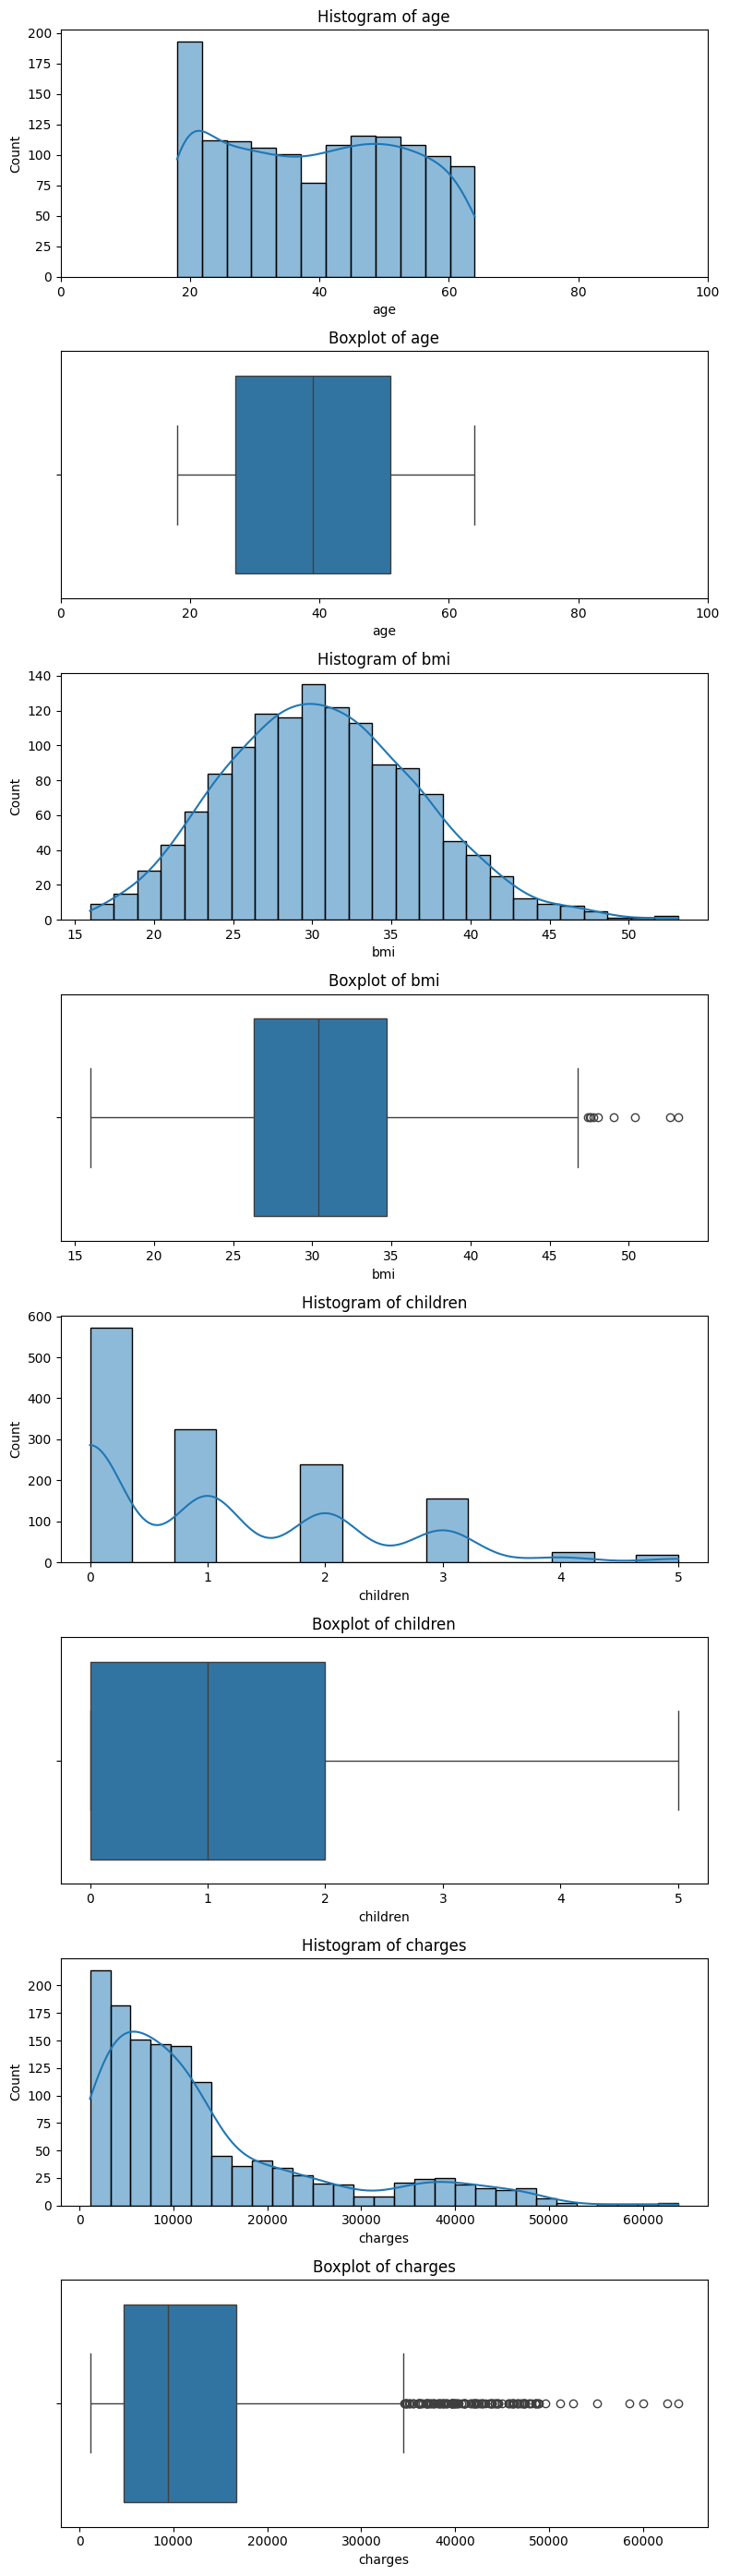

In [7]:
#Automatizacion Numerales
numericals_variables = ["age", "bmi", "children", "charges"]
 # Crear la figura con 1 columnas y 2 filas por variable.
fig, axis = plt.subplots(len(numericals_variables) * 2, 1, figsize=(8, len(numericals_variables) * 7))
    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        # Añadir más columnas y rangos si es necesario...
    }
    # Iterar sobre cada columna del DataFrame
for i, col in enumerate(numericals_variables):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_limpio, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma
        # Boxplot en la segunda fila
        sns.boxplot(data = data_limpio, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot
plt.tight_layout()
plt.show()

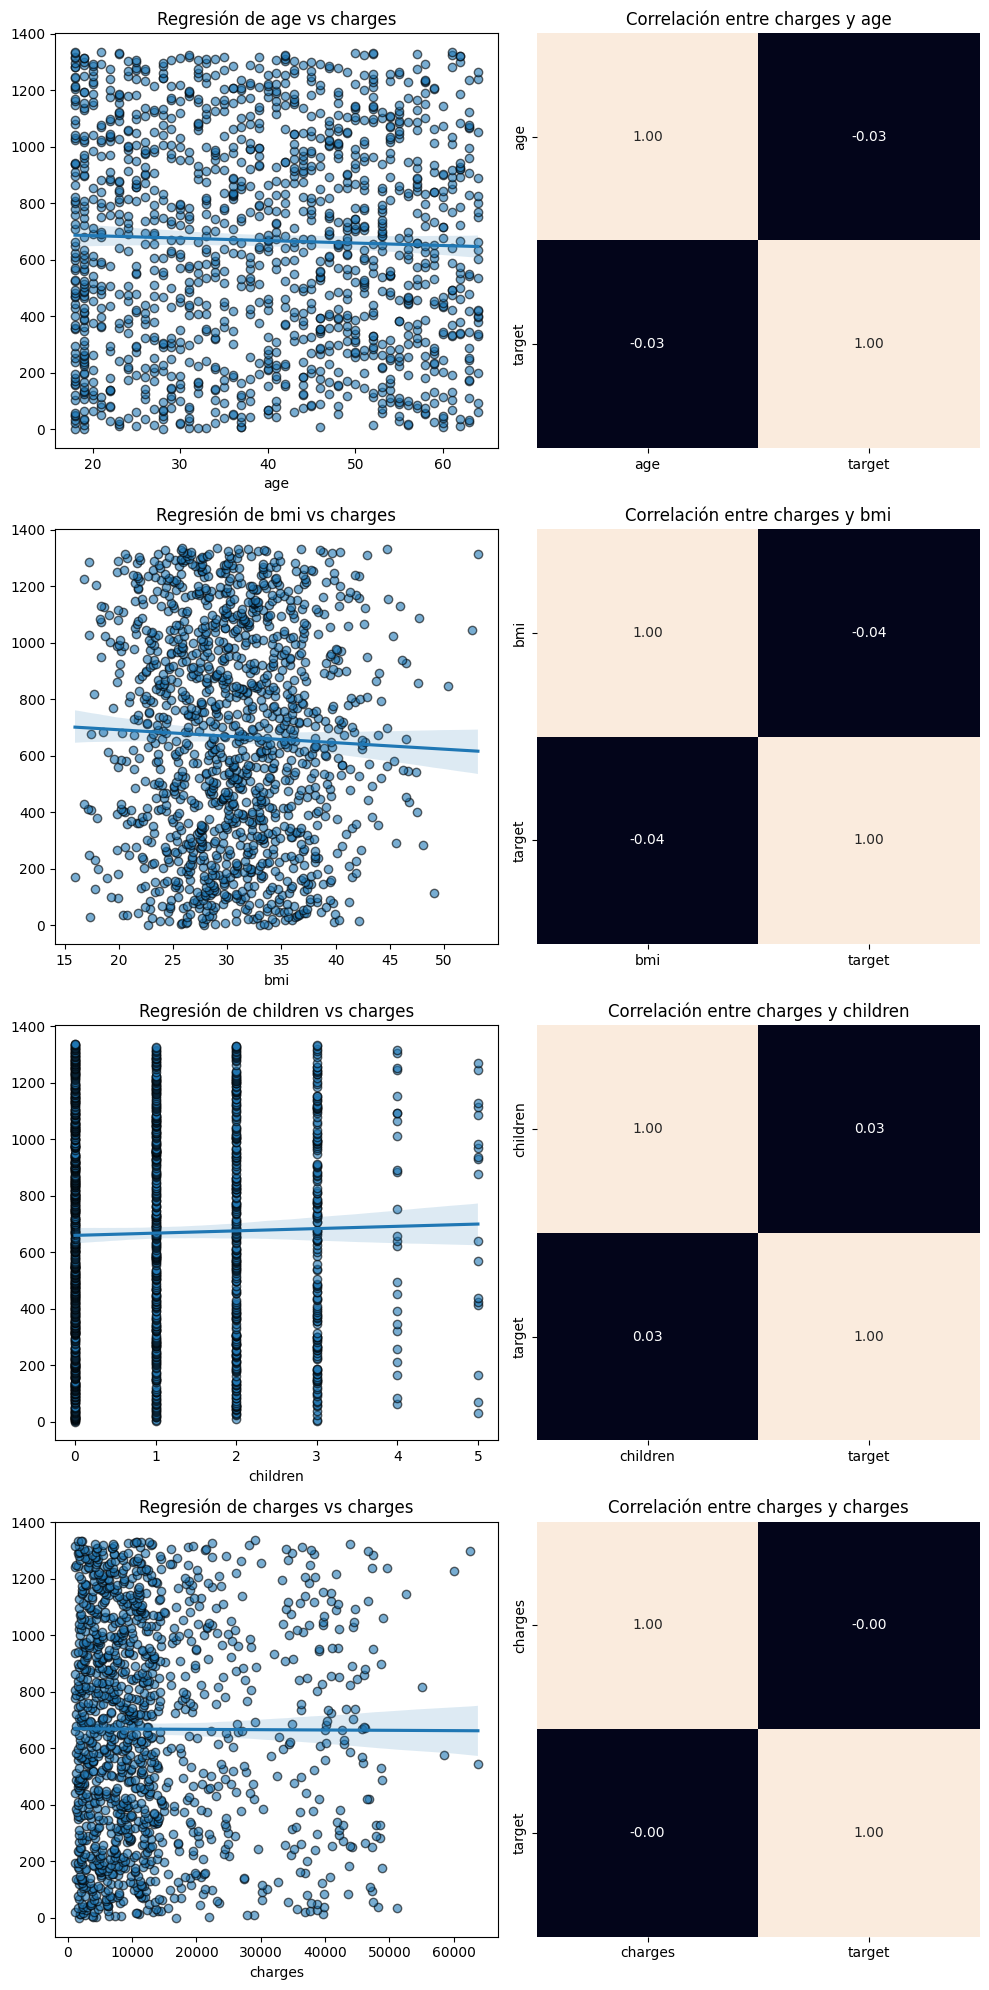

In [8]:
# # Automatizacion Numerico-Numerico

# Crear la variable objetivo (categórica)
target = data_limpio["charges"]

# Factorizar el target y guardar el nombre de la columna
target_numeric = pd.factorize(target)[0]  # Convertir a valores numéricos
target_name = target.name  # Guardar el nombre de la columna original

# Variables numéricas
num_variables = ["age", "bmi", "children", "charges"]

# Crear la figura y los ejes
num_rows = len(num_variables)
fig, axis = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Crear gráficos para cada variable
for i, var in enumerate(num_variables):
    # Scatterplot con regresión lineal
    sns.regplot(ax=axis[i, 0], data=data_limpio, x=var, y=target_numeric, scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
    axis[i, 0].set_title(f"Regresión de {var} vs {target_name}")
    
    # Heatmap de correlación
    correlation_data = data_limpio[[var]].assign(target=target_numeric)  # Crear un DataFrame con la variable y el target
    sns.heatmap(correlation_data.corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)
    axis[i, 1].set_title(f"Correlación entre {target_name} y {var}")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [9]:
sex = data_limpio["sex"].unique().tolist()
smoker = data_limpio["smoker"].unique().tolist()
region = data_limpio["region"].unique().tolist()
sex_transformation_rules = {sex: idx for idx, sex in enumerate(sex)}
smoker_transformation_rules = {smoker: idx for idx, smoker in enumerate(smoker)}
region_transformation_rules = {region: idx for idx, region in enumerate(region)}
with open("sex_transformation_rules.json", "w") as f:
    json.dump(sex_transformation_rules, f)
with open("smoker_transformation_rules.json", "w") as f:
    json.dump(smoker_transformation_rules, f)
with open("region_transformation_rules.json", "w") as f:
    json.dump(region_transformation_rules, f)

C:\Users\aguil\AppData\Local\Temp\ipykernel_15364\280939848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpio["sex_n"] = pd.factorize(data_limpio["sex"])[0]
C:\Users\aguil\AppData\Local\Temp\ipykernel_15364\280939848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpio["smoker_n"] = pd.factorize(data_limpio["smoker"])[0]
C:\Users\aguil\AppData\Local\Temp\ipykernel_15364\280939848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

<Axes: >

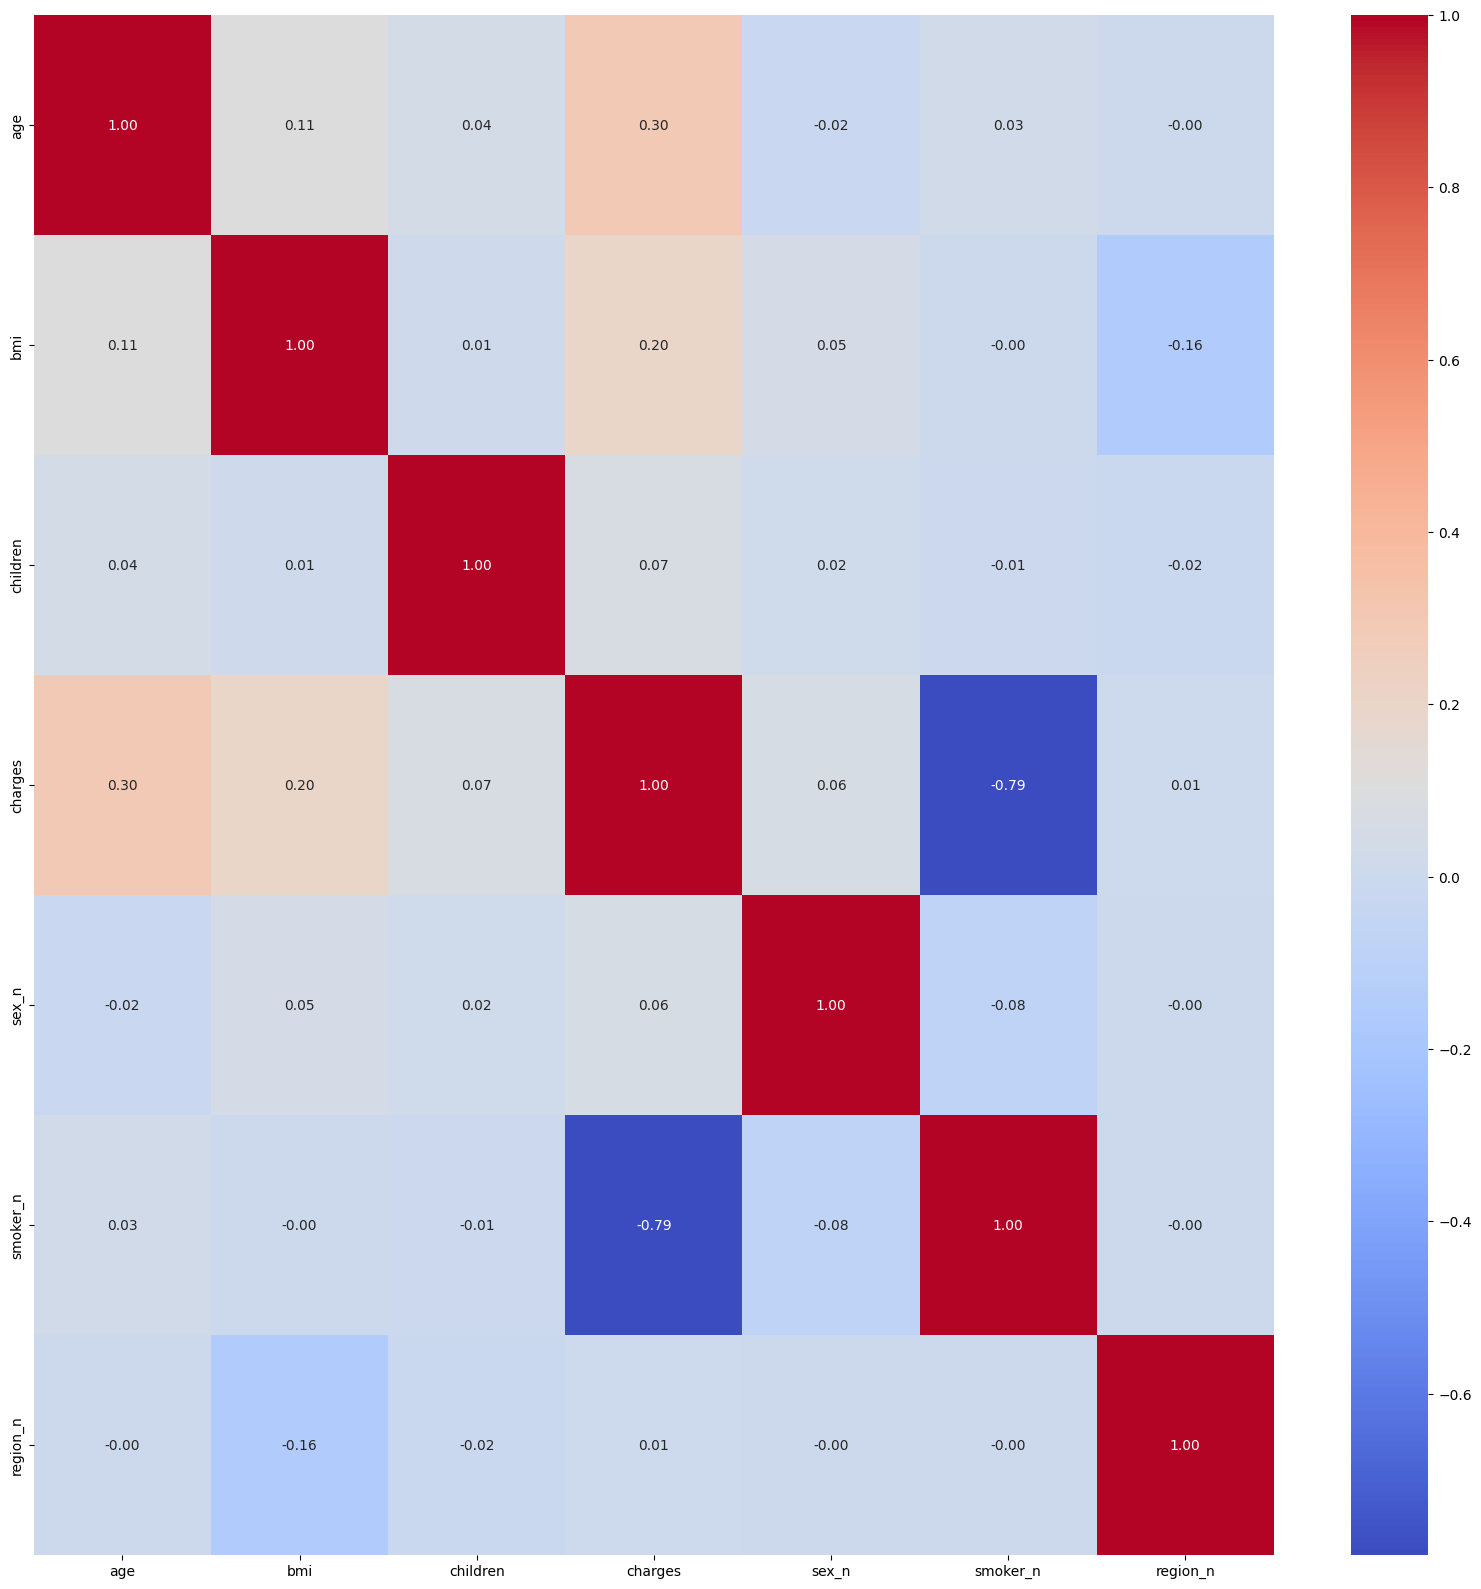

In [10]:
#factorizamos las categóricas
data_limpio["sex_n"] = pd.factorize(data_limpio["sex"])[0]
data_limpio["smoker_n"] = pd.factorize(data_limpio["smoker"])[0]
data_limpio["region_n"] = pd.factorize(data_limpio["region"])[0]
total_numerical_variables = ["age", "bmi", "children", "charges", "sex_n", "smoker_n", "region_n"]
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(data_limpio[total_numerical_variables].corr(), annot=True, fmt='.2f', cmap="coolwarm")



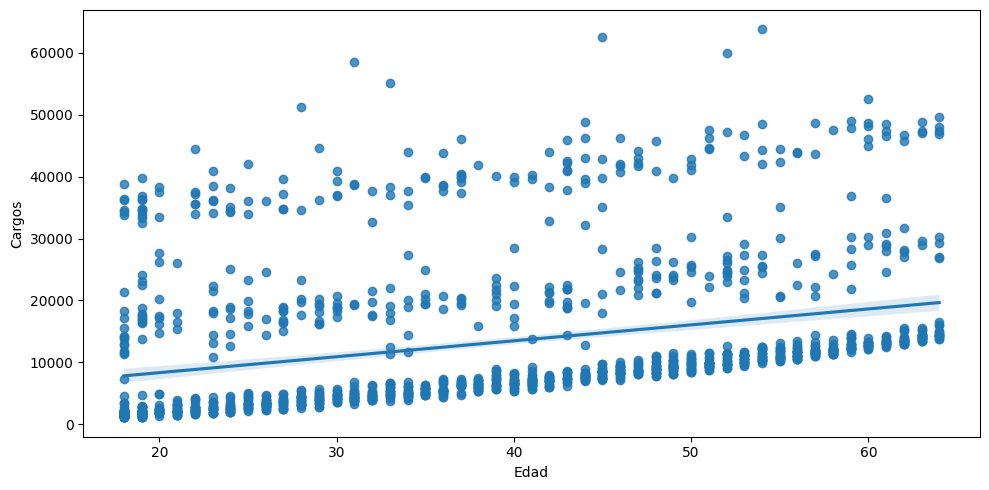

In [11]:
# Asumiendo que data_limpio es tu DataFrame
fig, axis = plt.subplots(figsize=(10, 5))
sns.regplot(data=data_limpio, x="age", y="charges", ax=axis)

# Añadir etiquetas a los ejes
axis.set_xlabel("Edad")  # Etiqueta para el eje x
axis.set_ylabel("Cargos")  # Etiqueta para el eje y

plt.tight_layout()
plt.show()

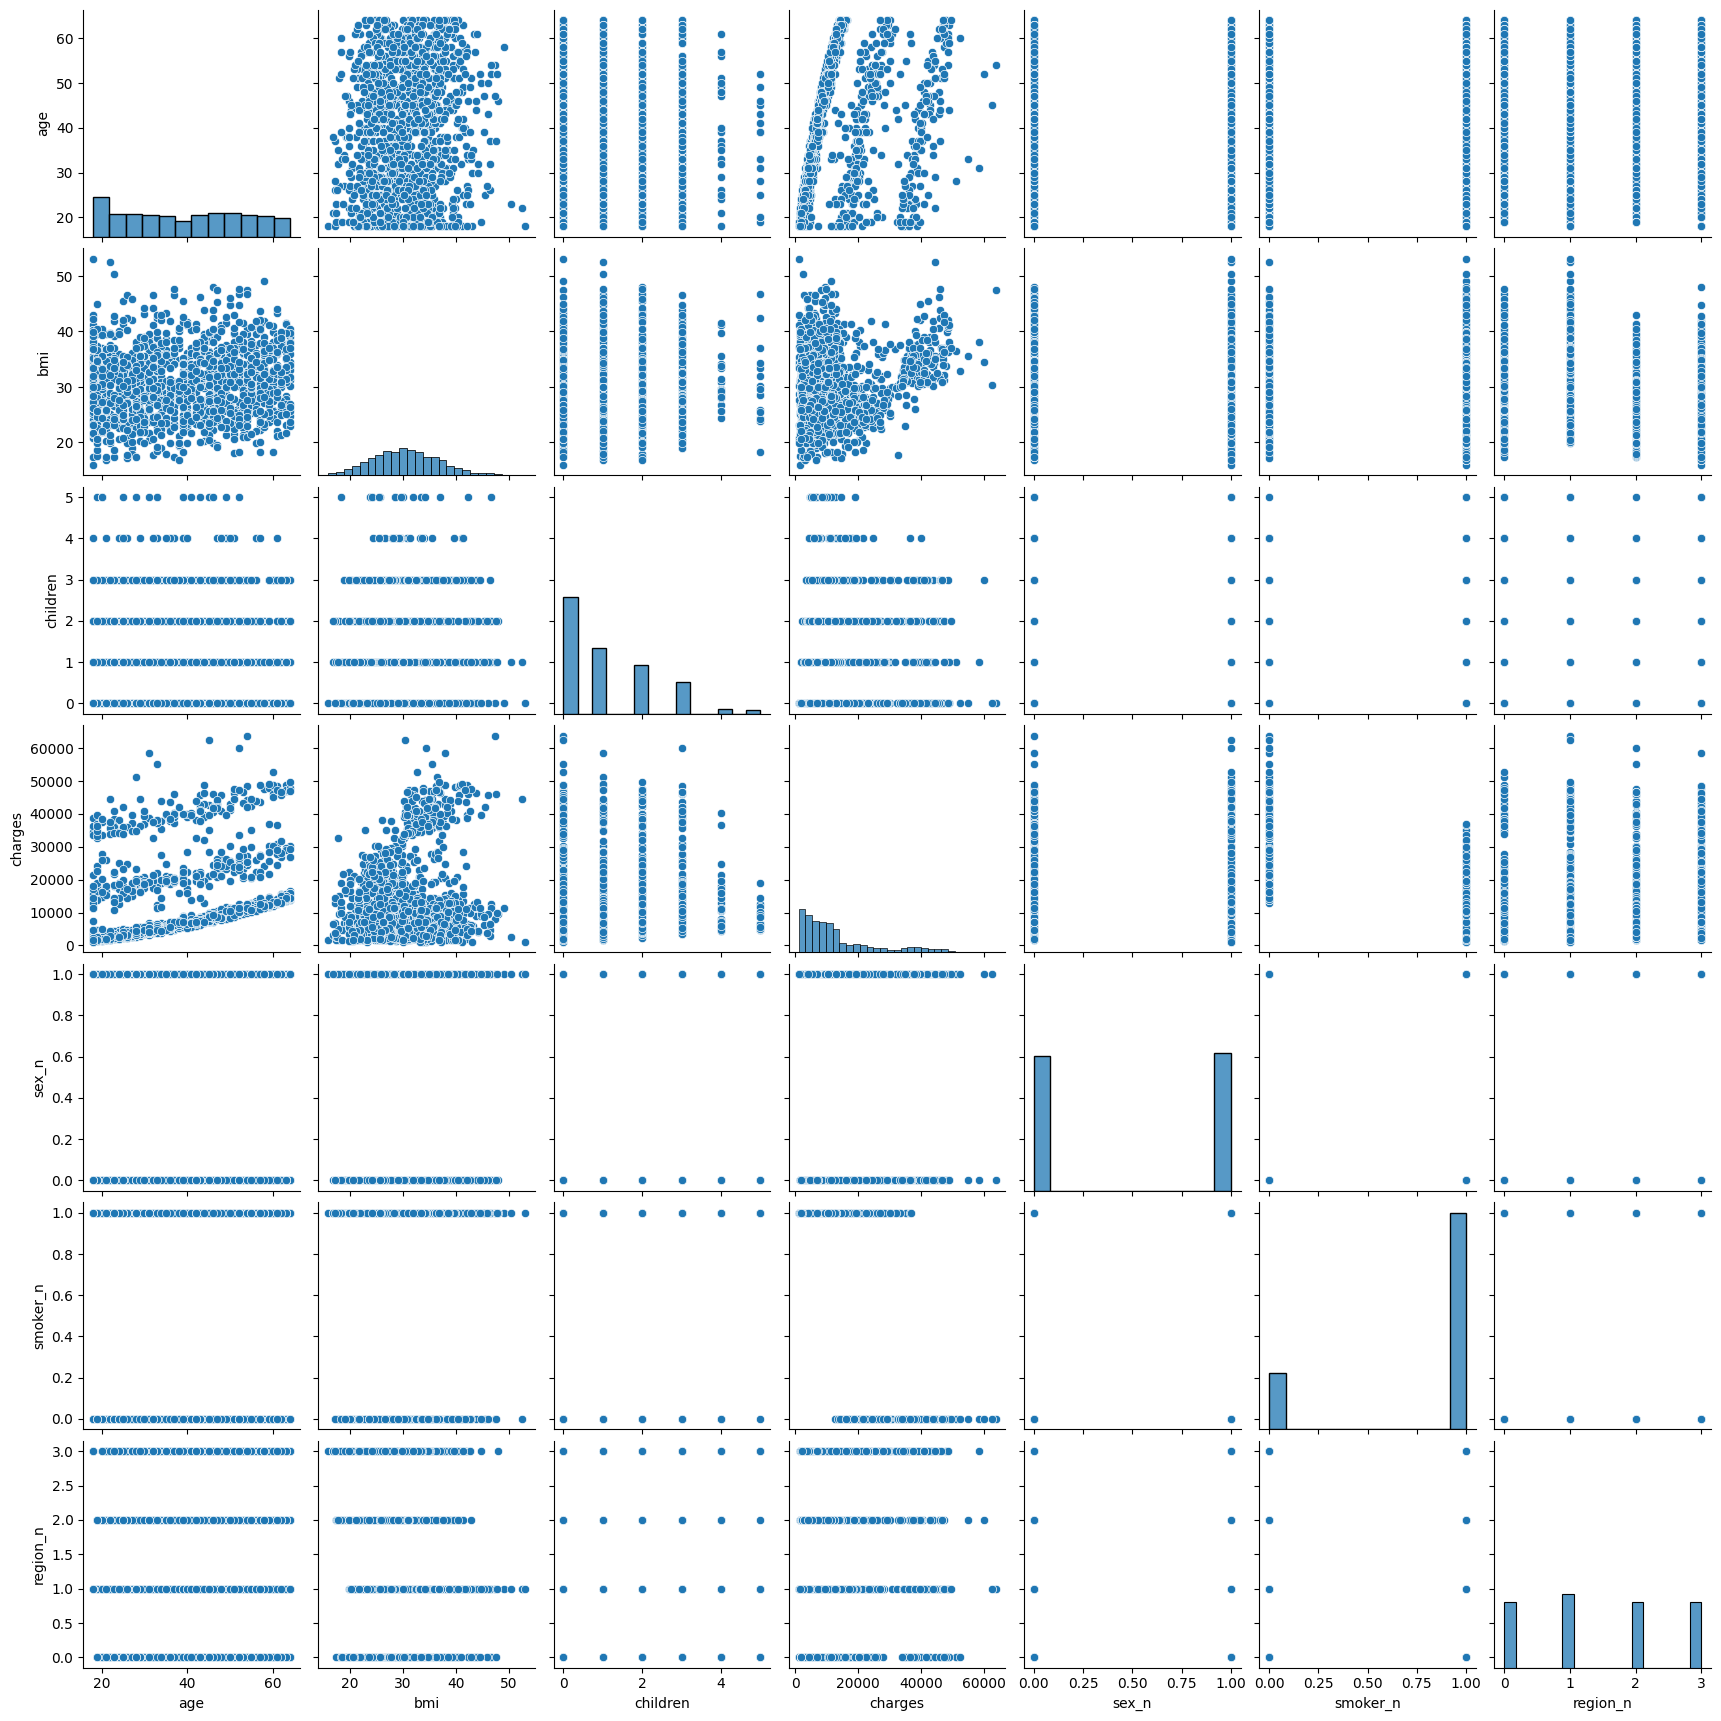

In [12]:
sns.pairplot(data = data_limpio)

In [13]:
data_limpio.describe


<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges  sex_n  \
0      19  female  27.900         0    yes  southwest  16884.92400      0   
1      18    male  33.770         1     no  southeast   1725.55230      1   
2      28    male  33.000         3     no  southeast   4449.46200      1   
3      33    male  22.705         0     no  northwest  21984.47061      1   
4      32    male  28.880         0     no  northwest   3866.85520      1   
...   ...     ...     ...       ...    ...        ...          ...    ...   
1333   50    male  30.970         3     no  northwest  10600.54830      1   
1334   18  female  31.920         0     no  northeast   2205.98080      0   
1335   18  female  36.850         0     no  southeast   1629.83350      0   
1336   21  female  25.800         0     no  southwest   2007.94500      0   
1337   61  female  29.070         0    yes  northwest  29141.36030      0   

      smoker_n  region_n  
0            0

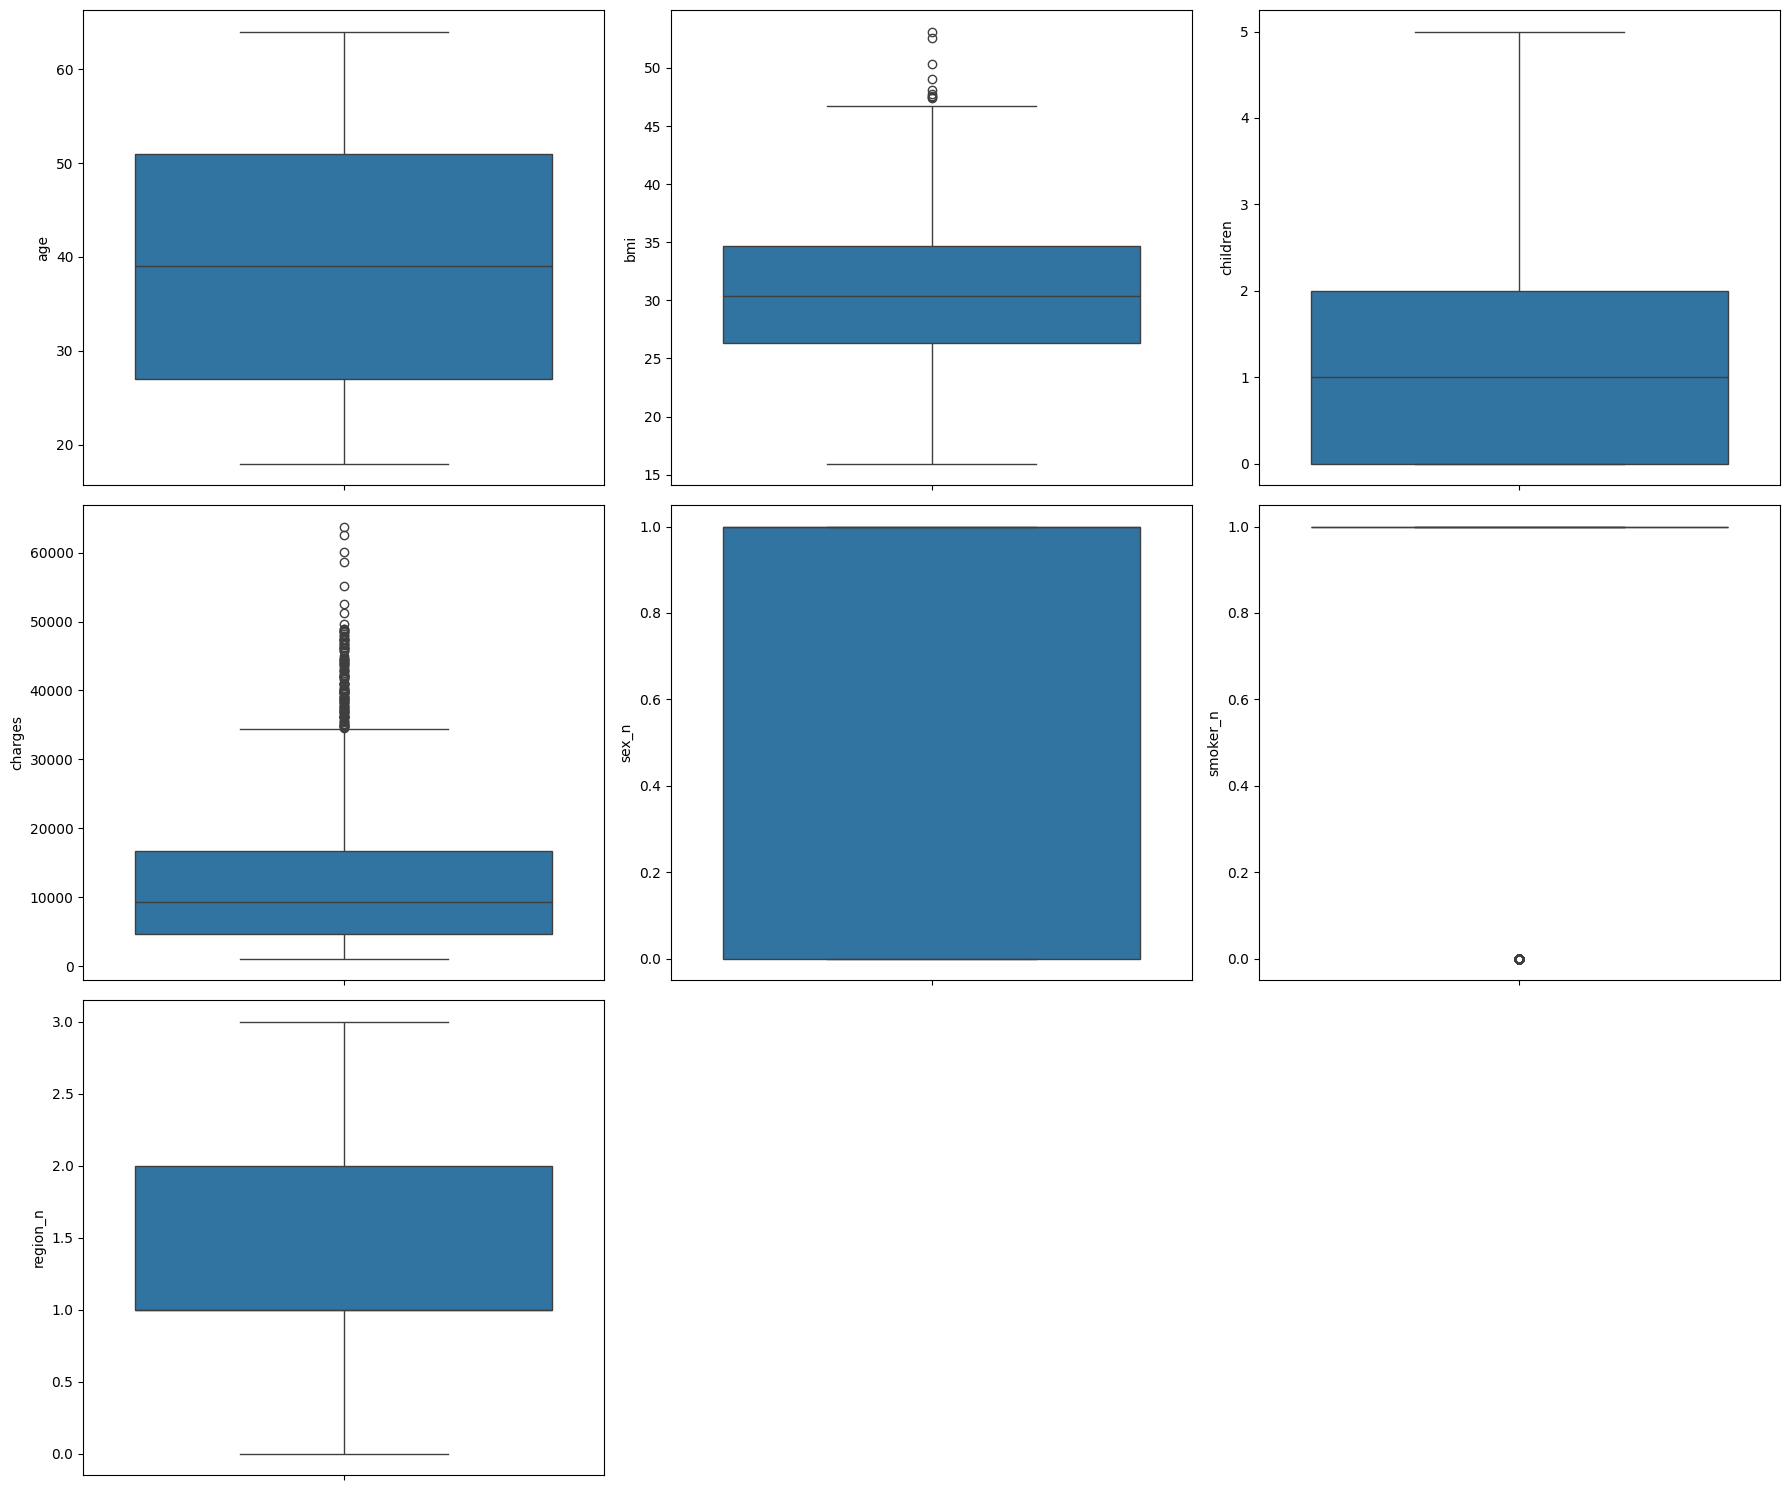

In [14]:
## Obtener las columnas numéricas del DataFrame
columns = data_limpio.select_dtypes(include=['number']).columns.tolist()
# Crear la figura y los ejes
num_rows = (len(columns) + 2) // 3  # Calcular el número de filas necesarias
#indicar número de columnas que deseas
num_cols = 3
fig, axis = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
# Recorrer las columnas y asignarlas a los ejes
for i, col in enumerate(columns):
    row = i // num_cols  # Calcula la fila
    col_index = i % num_cols  # Calcula el índice de la columna
    sns.boxplot(ax=axis[row, col_index], data=data_limpio, y=col)
# Eliminar ejes vacíos si los hay
for j in range(len(columns), num_rows * num_cols):
    fig.delaxes(axis.flatten()[j])  # Elimina los ejes vacíos
# Ajustar el diseño
plt.tight_layout()
# Mostrar los gráficos
plt.show()

In [15]:
import json
variables_outliers = ["age", "bmi", "children", "charges", "sex_n", "smoker_n", "region_n"]
total_data_con_outliers = data_limpio.copy()
total_data_sin_outliers = data_limpio.copy()
def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]
outliers_dict = {}
for column in variables_outliers:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list
with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
outliers_dict

{'age': [18, np.float64(87.0)],
 'bmi': [np.float64(13.674999999999994), np.float64(47.31500000000001)],
 'children': [0, np.float64(5.0)],
 'charges': [1121.8739, np.float64(34524.777625)],
 'sex_n': [0, np.float64(2.5)],
 'smoker_n': [np.float64(1.0), np.float64(1.0)],
 'region_n': [0, np.float64(3.5)]}

In [16]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [17]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

### ELEGIR LAS VARIABLES NUMÉRICAS (NO USAR LA TARGET)
num_variables = ["age", "bmi", "children", "charges", "sex_n", "smoker_n", "region_n"]
# Si deseas filtrar específicamente algunas columnas, puedes hacerlo aquí.
# Por ejemplo, si quieres excluir algunas columnas específicas:
excluded_columns = ["charges"]  # Coloca aquí cualquier columna que quieras excluir
# Filtrar las columnas excluidas
num_variables = [col for col in num_variables if col not in excluded_columns]
# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("charges", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("charges", axis = 1)[num_variables]
y = total_data_con_outliers["charges"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)
# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_train_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_train_sin_outliers.xlsx", index=False)
X_test_con_outliers.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_test_con_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_test_sin_outliers.xlsx", index=False)
y_train.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/y_train.xlsx", index=False)
y_test.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/y_test.xlsx", index=False)

In [19]:
from sklearn.preprocessing import StandardScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,-1.157680,-0.996928,-0.907908,0.971409,0.500292,1.383946
968,-1.300619,-0.792762,0.766904,0.971409,0.500292,1.383946
599,0.914926,1.154664,0.766904,-1.029432,0.500292,0.477983
170,1.701087,1.806837,-0.907908,0.971409,0.500292,-0.427981
275,0.557580,-0.651417,0.766904,-1.029432,0.500292,1.383946


In [20]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,0.108696,0.230024,0.0,1.0,1.0,1.000000
968,0.065217,0.263250,0.4,1.0,1.0,1.000000
599,0.739130,0.580172,0.4,0.0,1.0,0.666667
170,0.978261,0.686306,0.0,1.0,1.0,0.333333
275,0.630435,0.286252,0.4,0.0,1.0,1.000000


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif
import os
import pandas as pd

# Con un valor de k = 4 (podemos elegir cualquier otro valor) decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_con_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])

# GUARDO X_train_sel.columns
import json

with open("feature_selection_k_5.json", "w") as f:
  json.dump(X_train_sel.columns.tolist(), f)

X_train_sel.head()

C:\Users\aguil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,children,sex_n,smoker_n,region_n
0,0.0,1.0,1.0,1.000000
1,0.4,1.0,1.0,1.000000
2,0.4,0.0,1.0,0.666667
3,0.0,1.0,1.0,0.333333
4,0.4,0.0,1.0,1.000000


In [22]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)
X_train_sel.to_csv("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/clean_train.csv", index = False)
X_test_sel.to_csv("C:/Users/aguil/OneDrive/Desktop/proyectos javier/regresion-lineal/models/excel/clean_test.csv", index = False)